In [1]:
import torch
from models import RNN_Map, Markov_Map
from tqdm import tqdm
from util import get_stddev, fp_to_list
import logging
import sys
import string
%matplotlib inline
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(message)s', datefmt='%m-%d %H:%M', stream=sys.stdout)
using_GPU = torch.cuda.is_available()

02-01 05:39 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Brown Corpus

In [2]:
corpus = 'brown'
markov_order = 3 # Change markov_order to test with a different order of markov model
num_node = 500 # number of nodes when zipf's law

In [3]:
#y_limit = 500
model_path = './data/checkpoint/' + corpus + '/rnn.pkl'
train_tokens_fp = './data/'+ corpus + '/train_tokens.txt'
test_tokens_fp = './data/'+ corpus +'/test_tokens.txt'

In [4]:
test_tokens = fp_to_list(test_tokens_fp)
train_tokens = fp_to_list(train_tokens_fp)
markov_map = Markov_Map(markov_order, train_tokens, num_node)
rnn_map = RNN_Map(model_path, num_node, using_GPU)
markov_cnt_per_node = markov_map.cnt_per_node(num_node, test_tokens)
rnn_cnt_per_node = rnn_map.cnt_per_node(num_node, test_tokens)

100%|██████████| 14519/14519 [00:50<00:00, 289.75it/s]


02-01 05:40 update_title_pos
02-01 05:40 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/labry/miniconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
02-01 05:40 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/labry/miniconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
02-01 05:40 update_title_pos
02-01 05:40 update_title_pos
02-01 05:40 update_title_pos
02-01 05:40 update_title_pos
02-01 05:40 update_title_pos


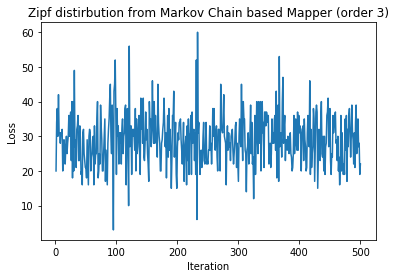

02-01 05:40 update_title_pos
02-01 05:40 update_title_pos
02-01 05:40 update_title_pos
02-01 05:40 update_title_pos


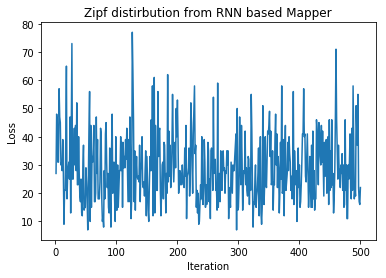

In [5]:
plt.figure()
plt.title("Zipf distirbution from Markov Chain based Mapper (order " + str(markov_order) + ")")
zipf_xrange = [i+1 for i in list(range(500))]
plt.xlabel("Iteration x 실수입니다.")
plt.ylabel("Loss x 실수입니다.")
#plt.ylim(top=y_limit)
plt.plot(zipf_xrange, markov_cnt_per_node)
plt.figure()
plt.title("Zipf distirbution from RNN based Mapper")
zipf_xrange = [i+1 for i in list(range(num_node))]
plt.xlabel("Iteration x 실수입니다.")
plt.ylabel("Loss x 실수입니다.")
#plt.ylim(top=y_limit)
plt.plot(zipf_xrange, rnn_cnt_per_node)

In [6]:
markov_std_dev = get_stddev(num_node, len(test_tokens), markov_cnt_per_node)
rnn_std_dev = get_stddev(num_node, len(test_tokens), rnn_cnt_per_node)
logging.info("standard deviation for Makov model: {}, for RNN: {}".format(markov_std_dev, rnn_std_dev))

02-01 05:40 standard deviation for Makov model: 1.365154247284427, for RNN: 2.249722040517646


# Coca Corpus

In [7]:
corpus = 'coca'
markov_order = 3 # Change markov_order to test with a different order of markov model
num_node = 500 # number of nodes when zipf's law

## 2gram

In [8]:
num_gram = 2 # Change num_gram to test on other datasets (num_gram: 2, 3, 4, 5)

In [10]:
#y_limit = 500
model_path = './data/checkpoint/' + corpus + '/rnn_' + corpus + str(num_gram) + '.pkl'
train_tokens_fp = './data/'+ corpus + '/' + str(num_gram) + 'gram' + '/train_tokens.txt'
test_tokens_fp = './data/'+ corpus + '/' + str(num_gram) + 'gram' + '/test_tokens.txt'
alphabets = list(string.ascii_lowercase) + ['_']

In [11]:
test_tokens = fp_to_list(test_tokens_fp)
train_tokens = fp_to_list(train_tokens_fp)
markov_map = Markov_Map(markov_order, train_tokens, num_node, alphabets=alphabets)
rnn_map = RNN_Map(model_path, num_node, using_GPU, alphabets=alphabets)
markov_cnt_per_node = markov_map.cnt_per_node(num_node, test_tokens)
rnn_cnt_per_node = rnn_map.cnt_per_node(num_node, test_tokens)

100%|██████████| 995035/995035 [1:31:23<00:00, 181.46it/s]


02-01 07:22 update_title_pos
02-01 07:22 update_title_pos
02-01 07:22 update_title_pos
02-01 07:22 update_title_pos
02-01 07:22 update_title_pos
02-01 07:22 update_title_pos


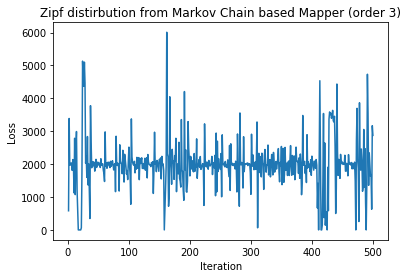

02-01 07:22 update_title_pos
02-01 07:22 update_title_pos
02-01 07:22 update_title_pos
02-01 07:22 update_title_pos


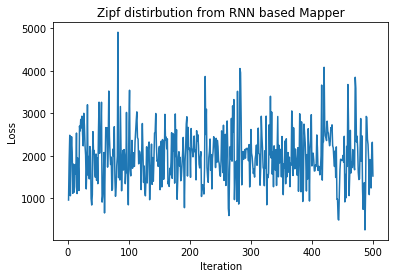

In [13]:
plt.figure()
plt.title("Zipf distirbution from Markov Chain based Mapper (order " + str(markov_order) + ")")
zipf_xrange = [i+1 for i in list(range(500))]
plt.xlabel("Iteration x 실수입니다.")
plt.ylabel("Loss x 실수입니다.")
#plt.ylim(top=y_limit)
plt.plot(zipf_xrange, markov_cnt_per_node)
plt.figure()
plt.title("Zipf distirbution from RNN based Mapper")
zipf_xrange = [i+1 for i in list(range(num_node))]
plt.xlabel("Iteration x 실수입니다.")
plt.ylabel("Loss x 실수입니다.")
#plt.ylim(top=y_limit)
plt.plot(zipf_xrange, rnn_cnt_per_node)

In [14]:
markov_std_dev = get_stddev(num_node, len(test_tokens), markov_cnt_per_node)
rnn_std_dev = get_stddev(num_node, len(test_tokens), rnn_cnt_per_node)
logging.info("standard deviation for Makov model: {}, for RNN: {}".format(markov_std_dev, rnn_std_dev))

02-01 07:22 standard deviation for Makov model: 17.037025226985033, for RNN: 13.982907343591863


# Encoding & Decoding

In [15]:
# encoding and decoding
position = markov_map.encode('apple')
print(position)
token = markov_map.decode(position)
print(token)
position = rnn_map.encode('apple')
print(position)
token = rnn_map.decode(position)
print(token)

0.06757933536455767
apple
0.06645241189468086
apple


# Simple Mapper on Brown Corpus

In [1]:
from models import Simple_Map
from util import fp_to_list, get_stddev
%matplotlib inline
import matplotlib.pyplot as plt
import logging
import sys
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(message)s', datefmt='%m-%d %H:%M', stream=sys.stdout)
corpus = 'brown'
num_node = 500
#y_limit = 500
test_tokens_fp = './data/'+ corpus +'/test_tokens.txt'

02-01 07:32 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
test_tokens = fp_to_list(test_tokens_fp)
simple_map = Simple_Map(num_node)

In [3]:
simple_cnt_per_node = simple_map.cnt_per_node(num_node, test_tokens)

100%|██████████| 14519/14519 [00:00<00:00, 21728.17it/s]


02-01 07:32 update_title_pos
02-01 07:32 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/labry/miniconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
02-01 07:32 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/labry/miniconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
02-01 07:32 update_title_pos
02-01 07:32 update_title_pos
02-01 07:32 update_title_pos
02-01 07:32 update_title_pos


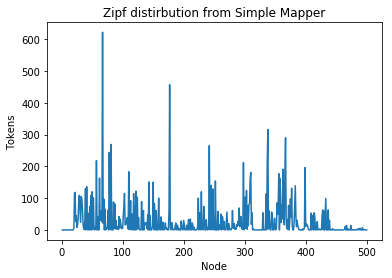

In [4]:
plt.figure()
plt.title("Zipf distirbution from Simple Mapper")
zipf_xrange = [i+1 for i in list(range(500))]
plt.xlabel("Node")
plt.ylabel("Tokens")
#plt.ylim(top=y_limit)
plt.plot(zipf_xrange, simple_cnt_per_node)

In [5]:
simple_std_dev = get_stddev(num_node, len(test_tokens), simple_cnt_per_node)
logging.info("standard deviation for simple model: {}".format(simple_std_dev))
# for Makov model: 1.365154247284427, for RNN: 2.249722040517646

02-01 07:32 standard deviation for simple model: 10.88306465828895


In [6]:
# encoding and decoding
position = simple_map.encode('apple')
print(position)
token = simple_map.decode(position)
print(token)

0.059820723627242035
apple
